In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/Users/phongsaphak/Documents/data_set/onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
group_age_gend = df.groupby(["Age","Gender"])["Gender"].value_counts().to_frame()
group_age_gend.head()

count
Age Gender       
18  Male        1
19  Female      1
    Male        3
20  Female      3
    Male        6

In [4]:
# plt.bar(group_age_gend.loc["Gender"],)
fm_group = group_age_gend.loc[(slice(None),"Female"),:]
fm_group.head()

,,count
Age,Gender,
19,Female,1
20,Female,3
21,Female,6
22,Female,26
23,Female,41


In [5]:
fm_group.index = fm_group.index.get_level_values("Age")
fm_group.head()

,count
Age,
19,1
20,3
21,6
22,26
23,41


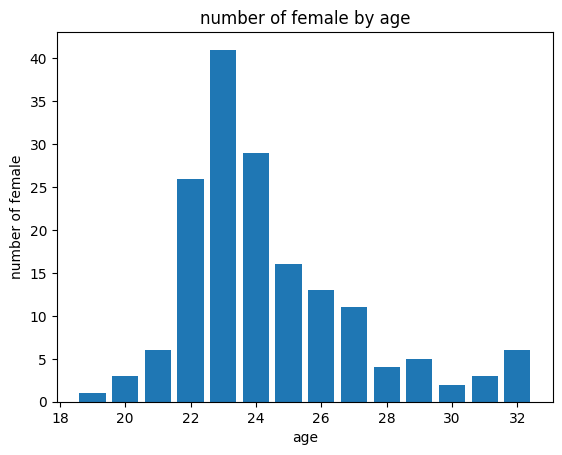

In [6]:
plt.bar(fm_group.index, fm_group["count"])
plt.xlabel("age")
plt.ylabel("number of female")
plt.title("number of female by age")
plt.show()

In [7]:
m_group = group_age_gend.loc[(slice(None),"Male"),:]
m_group.head()

,,count
Age,Gender,
18,Male,1
19,Male,3
20,Male,6
21,Male,17
22,Male,31


In [8]:
m_group.index = m_group.index.get_level_values("Age")
m_group.head()

,count
Age,
18,1
19,3
20,6
21,17
22,31


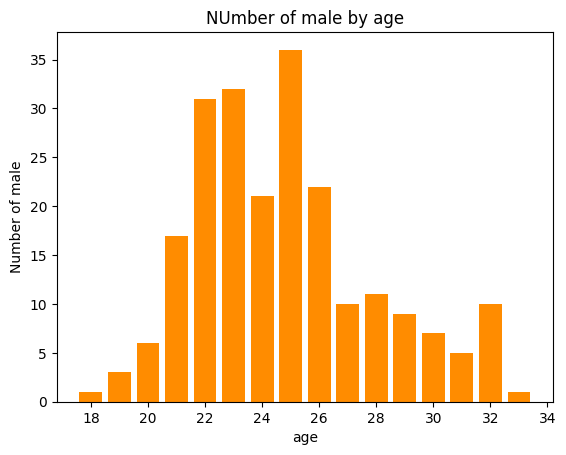

In [9]:
plt.bar(m_group.index, m_group["count"], color="darkorange")
plt.xlabel("age")
plt.ylabel("Number of male")
plt.title("NUmber of male by age")
plt.show()

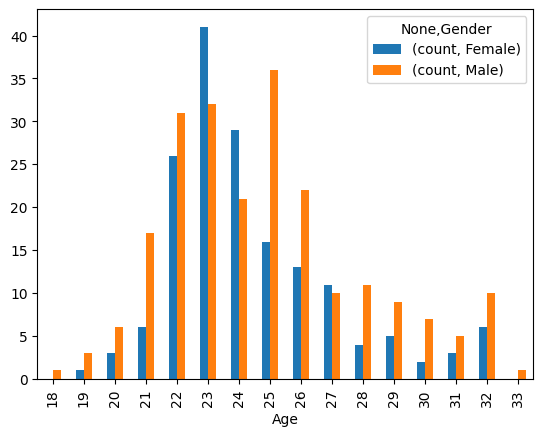

In [10]:
group_age_gend.unstack().plot(kind="bar")
plt.show()

In [23]:
df["Monthly Income"].unique()
grouped_income = df.groupby(["Monthly Income"])["Monthly Income"].value_counts().to_frame()


,count
Monthly Income,
10001 to 25000,45
25001 to 50000,69
Below Rs.10000,25
More than 50000,62
No Income,187


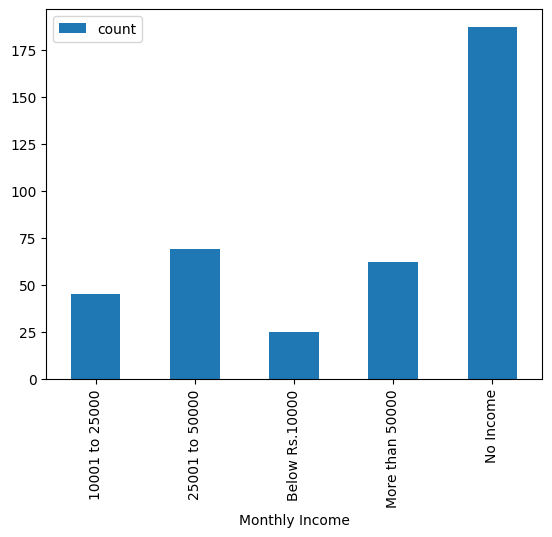

In [22]:
grouped_income.plot(kind="bar")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()